# E D A

El objetivo de este EDA es conocer las características del dataset con el fin de crear un sistema de recomendación ITEM-ITEM. Es decir, se busca recomendar una lista de videojuegos a partir de su similitud a un videojuego dado. 

Los criterios que se van a explorar son los géneros, análisis de sentimiento y recomendación de los usuarios.

In [45]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


In [3]:
# Lee la base de datos 
horas_jugadas = pd.read_parquet(r'G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_I\PI01-ABRIL2024\PARA_GITHUB\DATASETS\F01_PlaytimeGenre.parquet')
#horas_jugadas_usuario = pd.read_parquet(r'G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_I\PI01-ABRIL2024\PARA_GITHUB\DATASETS\F02_UserForGenre.parquet')
game_reviews = pd.read_parquet(r'G:\My Drive\HENRY\PROYECTO_INDIVIDUAL_I\PI01-ABRIL2024\PARA_GITHUB\DATASETS\F03_UsersRecommend.parquet')

In [51]:
game_reviews.head()

,user_id,item_id,sentiment_analysis,recommend,id,release_date,title,developer,release_year
0,76561197970982479,1250,2,True,1250,2009-05-14,Killing Floor,Tripwire Interactive,2009.0
1,death-hunter,1250,2,True,1250,2009-05-14,Killing Floor,Tripwire Interactive,2009.0
2,DJKamBer,1250,2,True,1250,2009-05-14,Killing Floor,Tripwire Interactive,2009.0
3,diego9031,1250,1,True,1250,2009-05-14,Killing Floor,Tripwire Interactive,2009.0
4,76561198081962345,1250,1,True,1250,2009-05-14,Killing Floor,Tripwire Interactive,2009.0


Se explora la diversidad de géneros de videojuegos

Existen 21 géneros diferentes en el dataset, y sus frecuencias son las siguientes: 


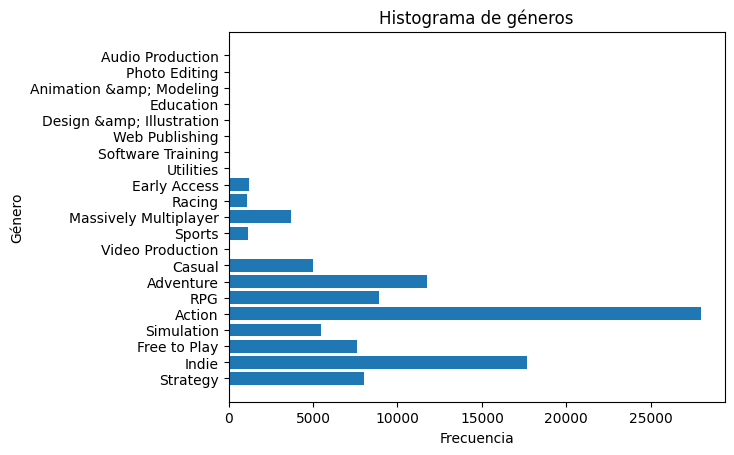

In [36]:
# Extraer la columna de géneros del data frame horas jugadas, para usarla como serie
frecuencia_valores = collections.Counter(horas_jugadas['genres'])

# Extrae los géneros y sus frecuencias directamente desde el objeto Counter
valores = list(frecuencia_valores.keys())
frecuencias = list(frecuencia_valores.values())

# Mensaje para mostrar:
print('Existen', len(frecuencia_valores), 'géneros diferentes en el dataset, y sus frecuencias son las siguientes: ')

# Instrucciones para desplegar el histograma
plt.barh(valores, frecuencias)
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Histograma de géneros')
plt.show()

Se explora la correlación entre el analisis de sentimiento de los videojuegos (es decir, reseñas de los usuarios desfavorables, neutras o favorables) y la decisión de los usuarios para recomendar o no cada videojuego. Esto se hizo mediante una prueba de idependencia chi-cuadrada de Person, la cual ayudaría a decidir si las variables deberían incluirse en el sistema de recomendación.

El resultado de la prueba es un chi-cuadrado = 3603.75, p = 0.0 con 2 grados de libertad. Esto se interpreta como que existe una correlación significativa entre la información del análisis de sentimiento y la recomendación de los usarios para cada videojuego. 

recommend           False  True 
sentiment_analysis              
0                    1978   4795
1                    2529  18573
2                     859  21706
Chi-cuadrado: 3603.750996622943
P-value: 0.0
Grados de libertad: 2


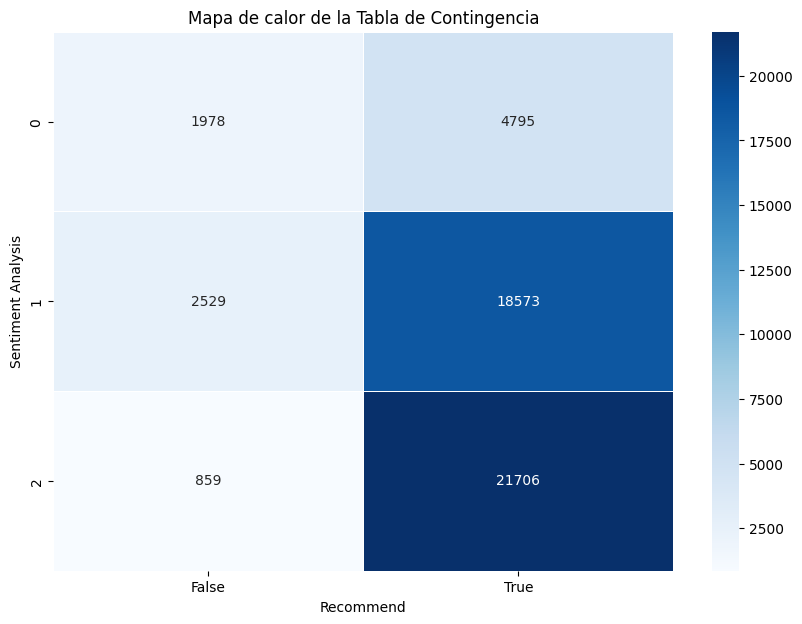

In [47]:

# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(game_reviews['sentiment_analysis'], game_reviews['recommend'])

# Imprime la tabla de contingencia para verla
print(tabla_contingencia)

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimir los resultados del test
print("Chi-cuadrado:", chi2)
print("P-value:", p)
print("Grados de libertad:", dof)

# Crear un mapa de calor
plt.figure(figsize=(10, 7))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(tabla_contingencia, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Mapa de calor de la Tabla de Contingencia')
plt.ylabel('Sentiment Analysis')
plt.xlabel('Recommend')

# Mostrar el gráfico
plt.show()